# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [15]:
import pandas as pd

df = pd.read_csv('/Users/miloneythakrar/Desktop/data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [16]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [19]:
temps = df['temperature']
temps.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [18]:
import matplotlib.pyplot as plt
import numpy as np

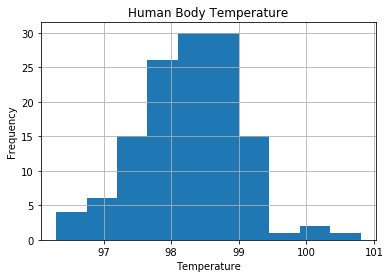

In [24]:
df.temperature.hist(bins=10)
plt.title("Human Body Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

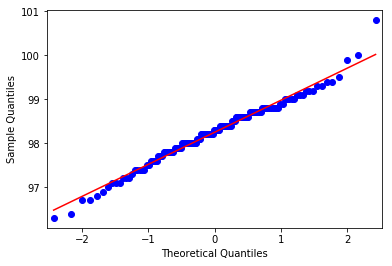

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(temps, loc = 98, scale = 0.7, line='s')
plt.show()

In [29]:
import scipy.stats as stats

In [30]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [31]:
len(df)

130

In [16]:
import numpy as np
bs_sample = np.random.choice(temps, size = len(temps))

In [17]:
np.mean(bs_sample)

98.22384615384615

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/miloneythakrar/Desktop/data/human_body_temperature.csv')
temps = df['temperature']

In [2]:
translated_temps = temps - np.mean(temps) + 98.6

In [4]:
def diff_from_truepopmean(data, truepop_value=98.6):
    return np.mean(data)-truepop_value

In [13]:
diff_obs = diff_from_truepopmean(temps)

In [19]:
diff_obs

-0.35076923076921673

In [14]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [15]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i]= bootstrap_replicate_1d(data,func)
    return bs_replicates

In [37]:
bs_replicates = draw_bs_reps(data=translated_temps, func= diff_from_truepopmean, size = 10000)


In [38]:
p_value = np.sum(bs_replicates <= diff_obs) /10000

In [39]:
print('p = ', p)

p =  0.0


In [18]:
sd_population = df.temperature.std()

In [20]:
import math;
sd_sample_distribution = sd_population / math.sqrt(df.temperature.size)
print(sd_sample_distribution)

0.06430441683789101


In [21]:
import scipy.stats as stats
sd_above = (stats.norm(0,1).ppf(1 - ((1 - 0.99)/2))) * sd_sample_distribution
print(sd_above)

0.165637201238663


In [22]:
sd_below = -1 * sd_above

In [23]:
df.temperature.mean()+sd_above

98.41486797046944

In [24]:
df.temperature.mean()+sd_below

98.08359356799211

In [26]:
sd_above = stats.t.ppf(1-0.005, df.temperature.size - 1) * sd_sample_distribution
print(sd_above)

0.16812252683319379


In [27]:
sd_below = -1 * sd_above

In [28]:
df.temperature.mean()+sd_above

98.41735329606396

In [29]:
df.temperature.mean()+sd_below

98.08110824239759

In [69]:
import pandas
import random

filename = '/Users/miloneythakrar/Desktop/data/human_body_temperature.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pandas.read_csv('/Users/miloneythakrar/Desktop/data/human_body_temperature.csv', skiprows=skip)
df['temperature']

0    98.4
1    97.8
2    99.0
3    97.4
4    98.8
5    98.2
6    98.0
7    97.6
8    98.0
9    97.1
Name: temperature, dtype: float64

In [72]:
sd_above = stats.norm(0,1).ppf(1 - ((1 - 0.99)/2)) * sd_sample_distribution
sd_below = -1 * sd_above
print(df.temperature.mean()+sd_above)
print(df.temperature.mean()+sd_below)

98.19563720123867
97.86436279876133


In [71]:
sd_above = stats.t.ppf(1-0.005, df.temperature.size - 1) * sd_sample_distribution
sd_below = -1 * sd_above
print(df.temperature.mean()+sd_above)
print(df.temperature.mean()+sd_below)

98.23897877947697
97.82102122052304


In [31]:
sd_above = stats.norm(0,1).ppf(1 - ((1 - 0.95)/2)) * sd_sample_distribution
sd_below = -1 * sd_above
print(df.temperature.mean()+sd_above)
print(df.temperature.mean()+sd_below)

98.3752651102799
98.12319642818166


In [32]:
males = df[df['gender'] == 'M'].temperature

In [33]:
females = df[df['gender'] == 'F'].temperature

In [34]:
males.mean()

98.1046153846154

In [35]:
females.mean()

98.39384615384613

In [37]:
sample_diff = males.mean() - females.mean()
print(sample_diff)

-0.289230769230727


In [39]:
standard_deviation_diff = math.sqrt((math.pow(males.std(), 2)/ males.size) + (math.pow(females.std(), 2)/ females.size))
print(standard_deviation_diff)

0.12655395041982642


In [ ]:
# Exercise 1_Human Body Temperature_Exercise 

https://dsintensivecommunity.springboard.com/t/q5m5xz/human-body-temp-exercise
http://justinbois.github.io/bootcamp/2016/lessons/l28_practice_with_hackerstats_solution.html

1. Is the distribution of body temperature normal?

The visual inspection of the histogram indicates that distibution of human body temperature is normally distibuted in 
that the data is fairly symmetrical and has no significant outliers.  The qq plot also indicates that human body 
temperature is normally distributed in that the data points fall approximately on the line. These visualization methods
are not sufficient to test the normality of the data. 

The pvalue reported by the normaltest (approx 25.9%) is significantly higher than the 5% significance level which 
indicates we can accept null hypothesis (the null hypothesis here being that df.temperature is normally distributed). 


2. Is the sample size large? Are the observations independent?

When determining and evaluating the sample size, it's important to take into consideration several factors including:
population size (i.e., total number of people that fit into the target demographic), margin of error, confidence level,
and standard deviation. The sample size is 130 and is large in that it is greater than 30, which is a condition 
that must be met to conduct a z-test. 

As stated in the question, independence is a condition for the Central Limit Theorem. The observations are independent in that each observation represents an individual's body temperature, which does not 
influence or impact the body temperature of another individual. In other words, one's body temperature is not dependent
on a another person's body temperature. 

3. Is the true population mean really 98.6 degrees F?

Temperature is a continuous variable so that it highly unlikely that the true population mean is the discrete value of
98.6. However, assuming that the sample population is representative of the true population, it is possible to 
calculate the population mean with a confidence interval of 99%.

First, try a bootstrap hypothesis test.

A bootstrap hypothesis test uses resampled data to conduct statistical inference. When conducting a bootstrap hypothesis 
test, the first step is to state the hypothesis test.  In this case, the null hypothesis is that true population mean 
for human body temperature equals 98.6. This begs the question is it possible to obtain a data sample like the one 
provided if the true population mean is 98.6 if we resample the data multiple times. Because we are comparing a dataset 
with a value (i.e., true population mean), a permutation test is not applicable. Thus, we need to simulate the data so
that true population mean is 98.6.  To achieve this, we have to shift the sample data mean such that it matches the
true population mean (i.e., 98.6). We then can use bootstrapping on this shifted data to simulate data acquisition 
under the null hypothesis.   

The test statistic is the mean of the bootstrap sample minus the true population mean. We then use draw bs reps to 
generate the bootstrap replicates. The data we pass into the function is are the translated temperature measurements 
because those we want to use to simulate the null hypothesis. The computation for the p-value to report the fraction of
bootstrap replicates that are less than the observed test statistic. We use less than because the mean from the data 
is less the the true population mean. The p-value is 0, which suggest we can reject the null hypothesis. 
 

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t  or  z  statistic?

The z statistic is appropriate to use because the sample size is greater than 30. In other words, the z statistic is
expected to be normally distributed when the sample size is greater than 30. The z statistic can be used with the 
sample std and sample mean to calculate the confidence intervals.  Even though we don't have the true population std, 
if n>30, then we can substitute the sample std for the population std. 

Using the z statistic, we can find the 99% confidence interval in which the true population mean will lie. We can use 
the standard deviation (SD) of our sample as the best estimate of our population SD. Using Central Limit Theorem, 
the SD of the sample distribution is sd_population / sqrt(sample_size). We are 99% confident that the true population 
mean is between 98.415 degrees and 98.084 degrees.

Two-sample tests are typically used when comparing two groups (e.g., male/female or control/treatment), which is not 
relevant in this case.  For this reason, a one-sample test is more appropriate. 

Now try using the other test. How is the result be different? Why?

The 99% confidence interval using the t-statistic is 98.417 degrees to 98.081 degrees which is a slightly smaller 
range than what was derived using the Z-statistic. 

4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In order to make an inference from a sample,the random, normal, and independent conditions must be met. The random 
condition can be met by using the random function.  When sampling without replacement, the sample should be no more 
than 10 percent of the population. It is safe to assume that the 130 people is no more than 10 percent of the entire 
human population, so this condition is also met. In order to meet the normal condition, there are at least 10 expected
failures and at least 10 expected successes.  This condition is not met because the total sample size is 10.  For this 
reason, we can cannot draw any inferences from the sample, thus neither is the correct one to use. If these conditions
were met, the t-test would be the correct test to use if the sample was <30. As such the sample data set would not be
normally distributed but rather follow a t distibution. 

Drawing a small sample size 10 from the data results revealed that when using the z statistic, we are 99% confident 
that the population mean is between 98.196 and 97.864. Similarly, the data results revealed with using the t statistic,
we are 99% confident that the population mean is between 98.239 and 97.821. 

5. At what temperature should we consider someone's temperature to be "abnormal"?
We can consider someone's temperature to abnormal if it is more than 98.38 (i.e., more than one standard deviation above 
the mean) or less than 98.12 (i.e., more than one standard deviation below the mean).
                                     
6. Is there a significant difference between males and females in normal temperature?

Assuming a null hypothesis that there is no difference between the male and female normal tempratures 
(difference of population mean is 0). The probability of getting a difference of -0.289 degrees is 
1.114%, which is less than 5% of a significance threshold. Thus, we can reject null hypothesis and assert that there is 
indeed a difference between the male population temperature and the female population temperature.

While it's nearly impossible to measure the body temprature of entire human population, we can make the following 
conclusions using Central Limit Theorem if we assume that the sample dataset is representative of the total population and 
the random, normal, and independent conditions for inference are met: 

Overall body temperature overall is normally distributed. 
We can be 99% confident that the true population mean is between 98.415 degrees and 98.084 degrees.
If someone's temperature is less than 98.38 degrees or greater than 98.12 it should be considered abnormal.
There is a significant difference between the male population temperature and the female population temperature. 
In addition, females tend to have a higher body temperature than males.

